# Bike Sharing Demand

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# EDA

C:\Users\rajsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

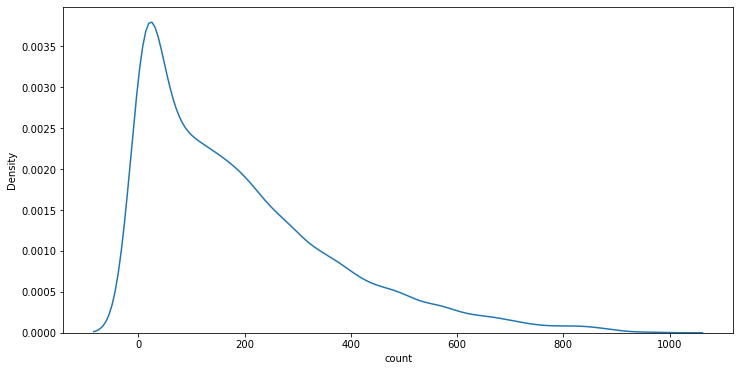

In [7]:
plt.figure(figsize=(12,6))
sns.distplot(df['count'],hist=False)

C:\Users\rajsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count'>

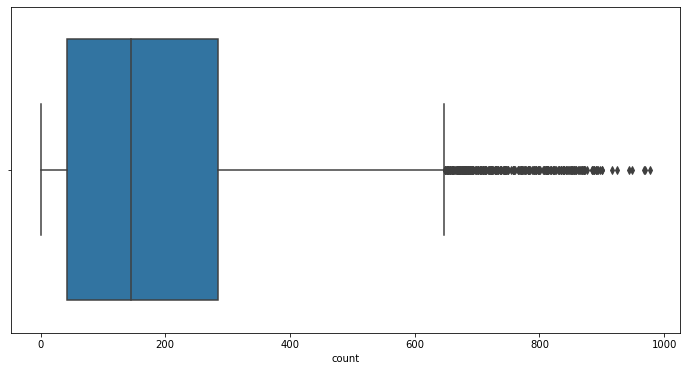

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(df['count'])

In [9]:
#right skewed data

In [10]:
groupby_season = df.groupby(df['season']).sum()
groupby_season.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,,,,,,,,,,
1,71,1828,3826,33656.90,40904.975,151216,39314.9233,41605,270893,312498
2,48,1893,3889,62376.58,72826.520,166311,36637.5229,129672,458610,588282
3,96,1845,3735,78680.64,88933.960,175250,31453.7195,142718,497944,640662
4,96,1846,3991,45519.02,54843.790,180919,31928.0527,78140,465894,544034


In [11]:
#season

<AxesSubplot:ylabel='count'>

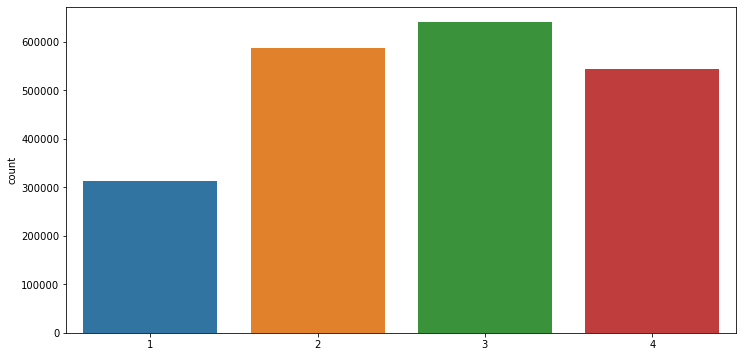

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x=[1,2,3,4], y=groupby_season['count'])

In [13]:
#which season has more holidays

<AxesSubplot:ylabel='holiday'>

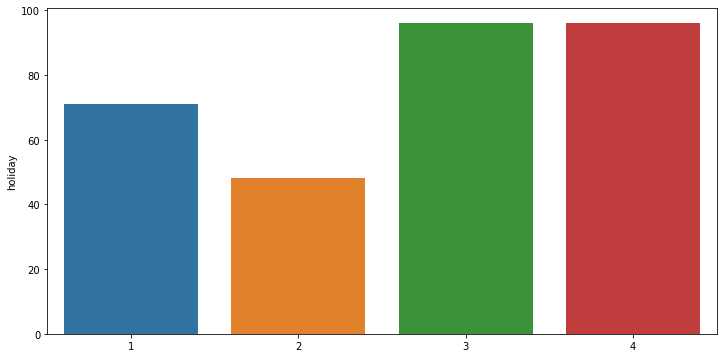

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(x=[1,2,3,4], y=groupby_season['holiday'])

In [15]:
#weather

In [16]:
groupby_weather = df.groupby(df['weather']).sum()
groupby_weather.head()

,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
weather,,,,,,,,,,
1,17959,204,4839,147846.82,172565.755,407907,92723.1626,289900,1186163,1476063
2,7171,92,1937,55587.80,65387.220,195831,34517.8506,87246,419914,507160
3,2156,15,635,16790.32,19544.905,69872,12087.2020,14983,87106,102089
4,1,0,1,8.20,11.365,86,6.0032,6,158,164


<AxesSubplot:ylabel='count'>

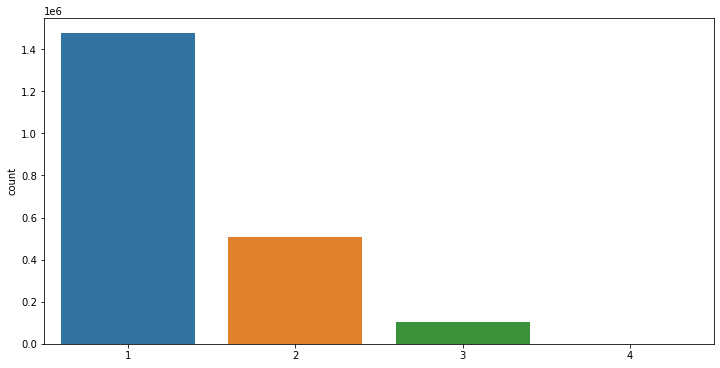

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x=[1,2,3,4], y=groupby_weather['count'])

In [18]:
groupby_holiday = df.groupby(df['holiday']).sum()
groupby_holiday.head()

,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
holiday,,,,,,,,,,
0,26448,7412,15008,213937.18,250232.655,654382,135229.1083,376964,1650704,2027668
1,839,0,433,6295.96,7276.590,19314,4105.1101,15171,42637,57808


<AxesSubplot:ylabel='count'>

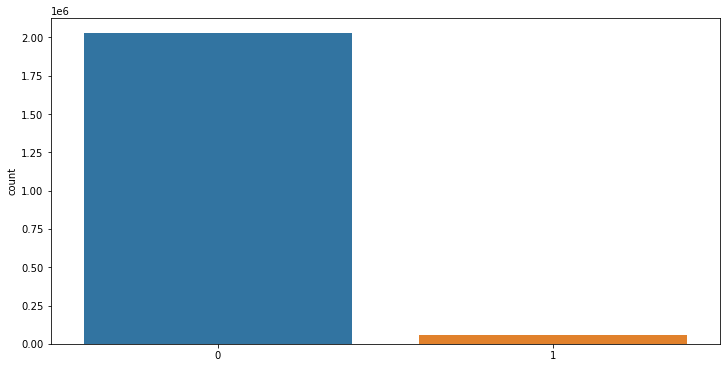

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(x=[0,1], y=groupby_holiday['count'])

In [20]:
#bikes are more rented on working day

C:\Users\rajsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workingday', ylabel='count'>

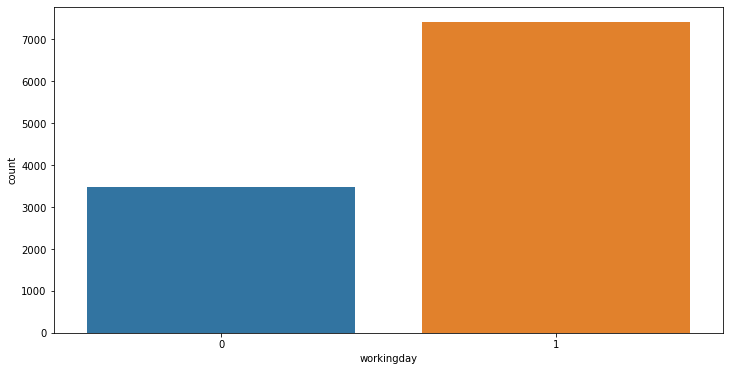

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(df['workingday'])

In [22]:
#but there are more working days as compared to holidays

C:\Users\rajsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rajsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rajsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='humidity', ylabel='Density'>

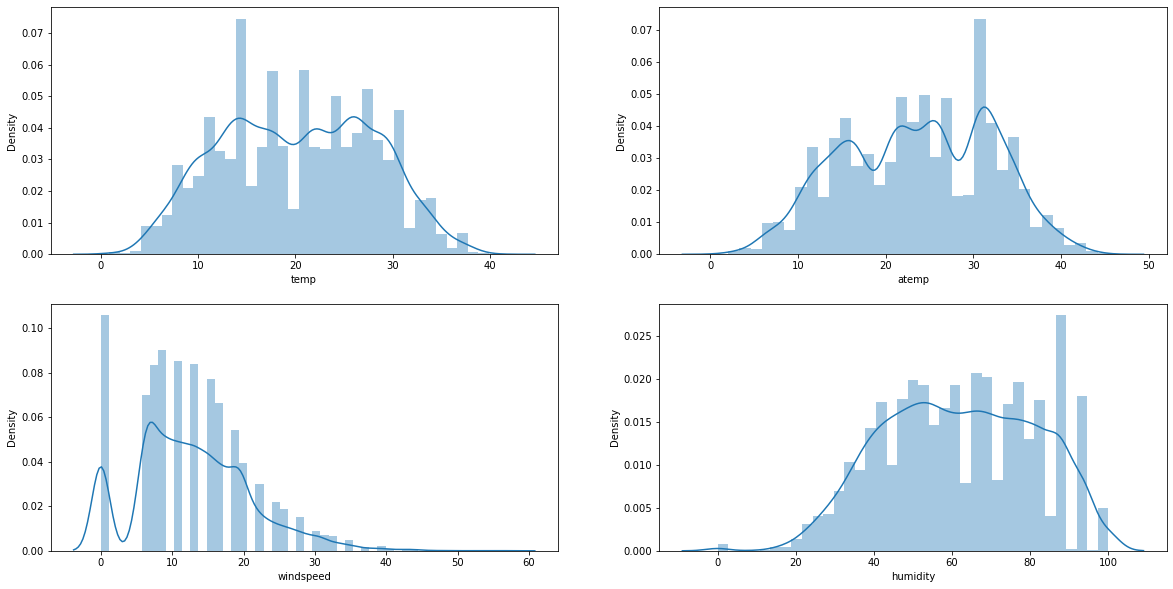

In [23]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(df['temp'],)
plt.subplot(2,2,2)
sns.distplot(df['atemp'],)
plt.subplot(2,2,3)
sns.distplot(df['windspeed'])
plt.subplot(2,2,4)
sns.distplot(df['humidity'])

C:\Users\rajsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rajsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rajsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rajsh\anacond

<AxesSubplot:xlabel='humidity', ylabel='count'>

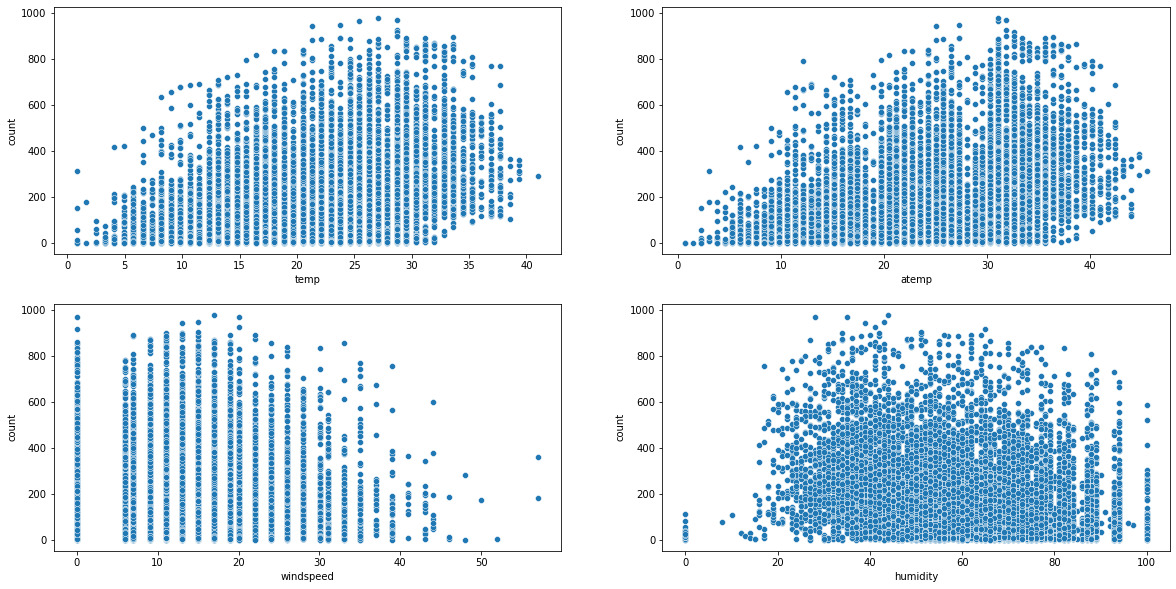

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.scatterplot(df['temp'],df['count'])
plt.subplot(2,2,2)
sns.scatterplot(df['atemp'],df['count'])
plt.subplot(2,2,3)
sns.scatterplot(df['windspeed'],df['count'])
plt.subplot(2,2,4)
sns.scatterplot(df['humidity'],df['count'])

In [25]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Feature Selection

In [26]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [28]:
df['year'] = df['datetime'].dt.year
df['date'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour

In [29]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,date,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [30]:
df['year'].unique()

array([2011, 2012], dtype=int64)

In [31]:
df_groupby_year = df.groupby('year').sum()

In [32]:
df_groupby_year

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,month,hour
year,,,,,,,,,,,,,,
2011,13620,144,3698,7734,107095.28,125557.720,343782,70074.7104,155817,626162,781979,54126,35452,62738
2012,13667,167,3714,7707,113137.86,131951.525,329914,69259.5080,236318,1067179,1303497,54653,35541,62904


<AxesSubplot:ylabel='count'>

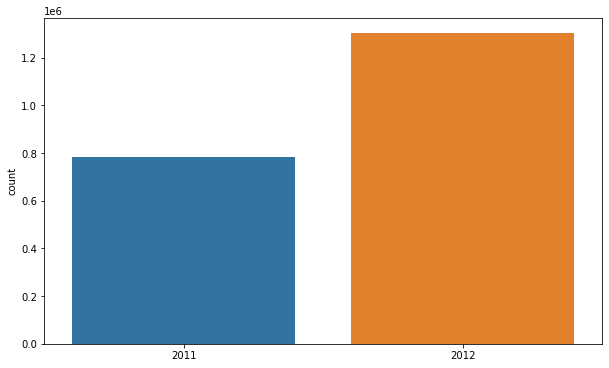

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x=[2011,2012], y=df_groupby_year['count'])

In [34]:
df.corr()['month']['season']

0.9715237996323898

In [35]:
df.corr()['temp']['atemp']

0.9849481104817075

In [36]:
dummies_season = pd.get_dummies(df['season'], prefix='season_')
dummies_weather = pd.get_dummies(df['weather'], prefix='weather_')

df_con = pd.concat([df,dummies_season,dummies_weather], axis=1)
df_con.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,month,hour,season__1,season__2,season__3,season__4,weather__1,weather__2,weather__3,weather__4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,1,0,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,1,1,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,1,2,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,1,3,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,1,4,1,0,0,0,1,0,0,0


In [37]:
#date and month column can be removed beacuse month has a very strong correlation with season.
#date could be misleading beacuse our training and test datasets have different dates.
#temp column can also be removed beacuse of high correlation with atemp prefering to chose atemp 
#beacuse it is the actual temp a person was feeling at that time and according to that he could choose whether to take a ride or not.
#also removing casual and registered cannot train data with it beacuse test data do not have these coloumns.

In [38]:
df_train = df_con.drop(['month','date','temp','datetime','casual','registered','season', 'weather','year'], axis=1)
df_train.head()

,holiday,workingday,atemp,humidity,windspeed,count,hour,season__1,season__2,season__3,season__4,weather__1,weather__2,weather__3,weather__4
0,0,0,14.395,81,0.0,16,0,1,0,0,0,1,0,0,0
1,0,0,13.635,80,0.0,40,1,1,0,0,0,1,0,0,0
2,0,0,13.635,80,0.0,32,2,1,0,0,0,1,0,0,0
3,0,0,14.395,75,0.0,13,3,1,0,0,0,1,0,0,0
4,0,0,14.395,75,0.0,1,4,1,0,0,0,1,0,0,0


# Right Skewed Data

In [39]:
count = np.log10(df_train['count'])
df_train['count'] = count
df_train.head()

,holiday,workingday,atemp,humidity,windspeed,count,hour,season__1,season__2,season__3,season__4,weather__1,weather__2,weather__3,weather__4
0,0,0,14.395,81,0.0,1.204120,0,1,0,0,0,1,0,0,0
1,0,0,13.635,80,0.0,1.602060,1,1,0,0,0,1,0,0,0
2,0,0,13.635,80,0.0,1.505150,2,1,0,0,0,1,0,0,0
3,0,0,14.395,75,0.0,1.113943,3,1,0,0,0,1,0,0,0
4,0,0,14.395,75,0.0,0.000000,4,1,0,0,0,1,0,0,0


In [40]:
X = df_train.drop('count', axis=1)
y = df_train['count']

In [41]:
X.head()

,holiday,workingday,atemp,humidity,windspeed,hour,season__1,season__2,season__3,season__4,weather__1,weather__2,weather__3,weather__4
0,0,0,14.395,81,0.0,0,1,0,0,0,1,0,0,0
1,0,0,13.635,80,0.0,1,1,0,0,0,1,0,0,0
2,0,0,13.635,80,0.0,2,1,0,0,0,1,0,0,0
3,0,0,14.395,75,0.0,3,1,0,0,0,1,0,0,0
4,0,0,14.395,75,0.0,4,1,0,0,0,1,0,0,0


<AxesSubplot:>

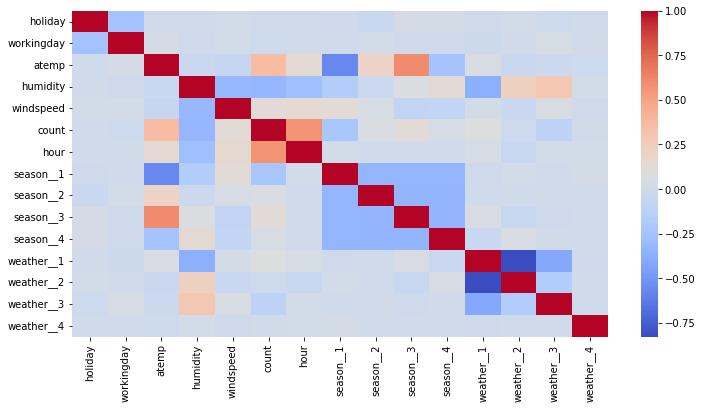

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(df_train.corr(), cmap='coolwarm')

C:\Users\rajsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

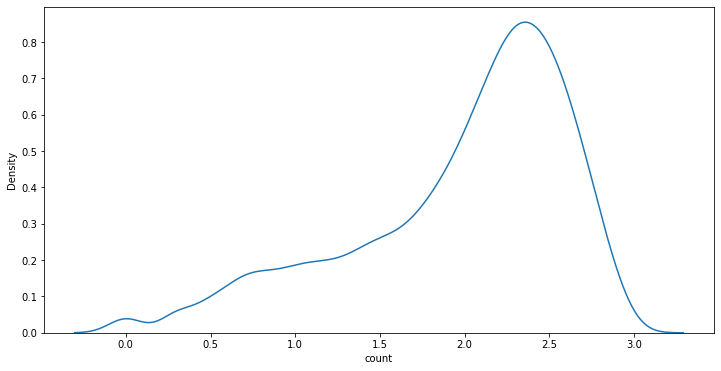

In [43]:
plt.figure(figsize=(12,6))
sns.distplot(y, hist=False)

C:\Users\rajsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count'>

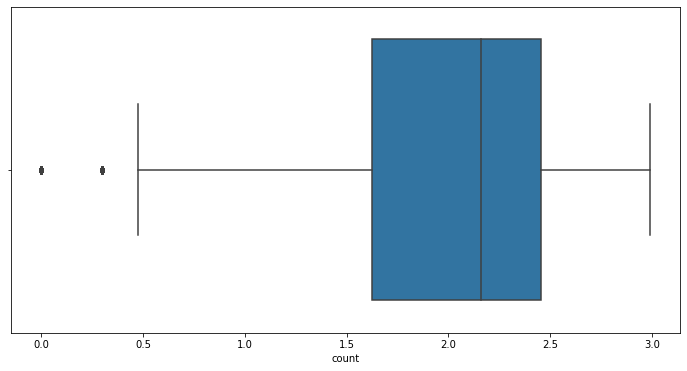

In [44]:
plt.figure(figsize=(12,6))
sns.boxplot(y)

# Model Selection

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [47]:
models = [RandomForestRegressor(), LinearRegression(), GradientBoostingRegressor(),KNeighborsRegressor(),SVR(), XGBRegressor()]
model_names = ['RandomForestRegressor','LinearRegression','GradientBoostingRegressor','KNeighborsRegressor','SVR','XGBRegressor']

In [48]:
rmse = []
for model in models:
    model.fit(X_train,y_train)
    model_pred = model.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(y_test,model_pred)))

In [49]:
rmse

[0.19636172060765922,
 0.47148207175353196,
 0.20759721355618602,
 0.3527811009970626,
 0.41463458245465185,
 0.18663118387158256]

# Choosing and Tuning Model

In [50]:
#now lets tune our model
#choosing random forest regressor

In [51]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [52]:
params_dict={'n_estimators':[100,250,350,500],'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict)
clf_rf.fit(X_train,y_train)
pred=clf_rf.predict(X_test)
print((np.sqrt(mean_squared_error(pred,y_test))))

0.19494426666979406


In [53]:
clf_rf.best_params_

{'max_features': 'auto', 'n_estimators': 350, 'n_jobs': -1}

In [54]:
X_train

,holiday,workingday,atemp,humidity,windspeed,hour,season__1,season__2,season__3,season__4,weather__1,weather__2,weather__3,weather__4
7478,0,1,23.485,48,7.0015,23,0,1,0,0,1,0,0,0
8876,0,0,31.060,61,12.9980,5,0,0,1,0,1,0,0,0
5885,0,1,20.455,62,8.9981,10,1,0,0,0,1,0,0,0
7698,0,1,29.545,73,6.0032,3,0,1,0,0,0,1,0,0
3449,0,0,31.820,79,23.9994,15,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0,1,13.635,93,11.0014,3,1,0,0,0,0,0,1,0
5695,0,1,17.425,81,7.0015,11,1,0,0,0,0,1,0,0
8006,0,1,31.060,50,19.0012,23,0,1,0,0,1,0,0,0
1361,0,0,15.150,76,22.0028,14,0,1,0,0,0,0,1,0


In [55]:
X_train.columns

Index(['holiday', 'workingday', 'atemp', 'humidity', 'windspeed', 'hour',
       'season__1', 'season__2', 'season__3', 'season__4', 'weather__1',
       'weather__2', 'weather__3', 'weather__4'],
      dtype='object')

# Trying Some Changes

In [56]:
#rounding off count

In [57]:
#round off didn't gave a great result
#trying another model Xgboost

In [58]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [59]:
random_search=RandomizedSearchCV(XGBRegressor(),param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [60]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                             

In [61]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [62]:
random_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [63]:
xgb_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=5,
             min_child_weight=3, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [64]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
             grow_policy=None, importance_type='gain',
             interaction_constraints='', learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
             max_depth=5, max_leaves=None, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor=None, random_state=0, ...)

In [65]:
X_test.head()

,holiday,workingday,atemp,humidity,windspeed,hour,season__1,season__2,season__3,season__4,weather__1,weather__2,weather__3,weather__4
8380,0,1,36.365,38,12.9980,13,0,0,1,0,1,0,0,0
9676,0,0,21.970,72,6.0032,13,0,0,0,1,0,1,0,0
5674,0,1,16.665,81,7.0015,14,1,0,0,0,0,0,1,0
9516,0,1,24.240,59,11.0014,21,0,0,1,0,1,0,0,0
6812,0,1,20.455,76,32.9975,4,0,1,0,0,1,0,0,0


In [66]:
xgb_pred = xgb_model.predict(X_test)

In [67]:
xgb_model.predict(X_test)

array([2.3724844 , 2.54211   , 1.7152097 , ..., 2.3242383 , 2.1855037 ,
       0.45618626], dtype=float32)

In [68]:
print(df.head())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  date  month  hour  
0        81        0.0       3          13     16  2011     1      1     0  
1        80        0.0       8          32     40  2011     1      1     1  
2        80        0.0       5          27     32  2011     1      1     2  
3        75        0.0       3          10     13  2011     1      1     3  
4        75        0.0       0           1      1  2011     1      1     4  


In [69]:
y_test.head()

8380    2.447158
9676    2.505150
5674    1.863323
9516    2.542825
6812    0.602060
Name: count, dtype: float64

In [70]:
print(np.sqrt(mean_squared_error(y_test,xgb_pred)))

0.18388851783047666


In [71]:
#Got best solution with Xgboost regressor when tuned with Random Search
#Got rmse with test dataset of 0.38556 top 4.25 percent

In [72]:
import pickle

In [73]:
model_filename = 'model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(xgb_model, file)

print(f"Model saved as {model_filename}")

Model saved as model.pkl
